In [1]:
import pandas as pd
df= pd.read_csv("tennis.csv")
df.head(10)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [2]:
#changing all the values to numerical values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df= df.apply(encoder.fit_transform)
df.head(10)

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [4]:
X= df.iloc[:,:-1].to_numpy() #for selecting all rows and columns wihout last column
Y= df.iloc[:,-1].to_numpy()#for selecting all rows and only the last column
# to_numpy isused to create an array
print(X)
print(Y)

[[2 1 0 0]
 [2 1 0 1]
 [0 1 0 0]
 [1 2 0 0]
 [1 0 1 0]
 [1 0 1 1]
 [0 0 1 1]
 [2 2 0 0]
 [2 0 1 0]
 [1 2 1 0]
 [2 2 1 1]
 [0 2 0 1]
 [0 1 1 0]
 [1 2 0 1]]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [6]:
from sklearn.tree import DecisionTreeClassifier
id3=  DecisionTreeClassifier(criterion ='entropy', max_depth=2)
id3.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]')]

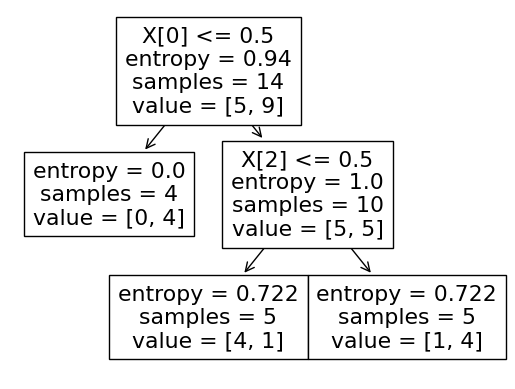

In [8]:
from sklearn import tree
tree.plot_tree(id3)

In [10]:
pred= id3.predict(X)
from sklearn.metrics import confusion_matrix
cm_id3= confusion_matrix(Y, pred)
print(cm_id3)

[[4 1]
 [1 8]]


In [11]:
TN, FP, FN, TP= confusion_matrix(list(Y), list(pred), labels=[0,1] ).ravel()
print("True Negatives", TN)
print("True Positives", TP)
print("False Positives", FP)
print("False Negatives", FN)

True Negatives 4
True Positives 8
False Positives 1
False Negatives 1


In [12]:
results={} #To Store all the metrics Result Values
#Finding Accuracy 
metric = "ACCURACY"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}") 
#Note the Formatting with f"{metric} and rounding to 3 decimal points with .3f

ACCURACY is  0.857


In [13]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

#Precision 
print(f"Precision is : {TP / (TP + FN)}")

#RECALL 
print(f"Recall is : {TP/ (TP + FN)}")

#SENSTIVITY 
print(f"Senstivity is : {TP / (TP + FN)}")

#SPECIFICITY 
print(f"Specificity is : {TN / (TN + FP)}")

MCC is  0.689
Precision is : 0.8888888888888888
Recall is : 0.8888888888888888
Senstivity is : 0.8888888888888888
Specificity is : 0.8


In [14]:
# using gini index
X= df.iloc[:,:-1].to_numpy()
Y= df.iloc[:,-1].to_numpy()
model_gini= DecisionTreeClassifier(criterion='gini', max_depth=2)
model_gini.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]')]

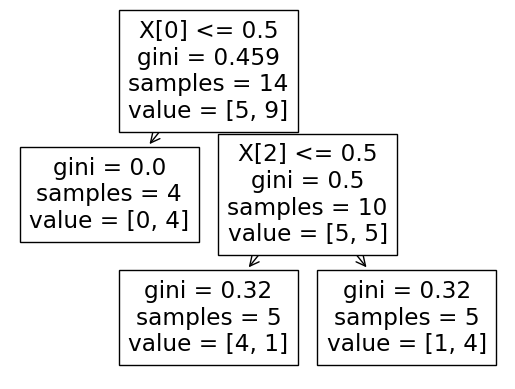

In [16]:
tree.plot_tree(model_gini)